In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.nn import Module, Sequential, Linear, Conv2d, ReLU, Tanh, CrossEntropyLoss
from torch.utils.data import DataLoader

from torchvision.transforms import transforms
import torchvision.datasets as datasets
from torch import optim

from torch.distributions.multivariate_normal import MultivariateNormal

from torchinfo import summary

from models import U_Net

from RectifiedFlow import RectifiedFlow_Unet, train_rectified_flow_Unet_init

In [2]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"
print(device)

cuda


In [3]:
batch_size = 256

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,))
    ])

train_dataset = datasets.MNIST(
    "./data",
    download=True,
    train=True,
    transform=transform,
)

train_dataset.data = train_dataset.data[train_dataset.targets == 6]
train_dataset.targets = train_dataset.targets[train_dataset.targets == 6]

test_dataset = datasets.MNIST(
    "./data",
    download=True,
    train=False,
    transform=transform,
)

train_dataloader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=1,
    pin_memory=True,
)

test_dataloader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=1,
    pin_memory=True,
)

In [4]:
input_shape = (batch_size, 2, 32, 32)

In [5]:
v_model_1 = U_Net(input_shape=input_shape, output_channels=1, initial_lr=5e-3, momentum=0.9, weight_decay=0.0)
rectified_flow_1 = RectifiedFlow_Unet(v_model_1, device)

In [6]:
optimizer_1 = torch.optim.Adam(rectified_flow_1.v_model.parameters(), lr=5e-3)
# optim.beta1 = 0.9
# optim.eps = 1e-8
#optimizer_1 = torch.optim.SGD(rectified_flow_1.v_model.parameters(), lr=5e-3, momentum=0.99)
scheduler_1 = optim.lr_scheduler.ReduceLROnPlateau(optimizer_1, factor=0.8, patience=80, verbose=True)

In [7]:
rectified_flow_1 = train_rectified_flow_Unet_init(rectified_flow_1, optimizer_1, scheduler_1, train_dataloader, device, epochs=60)

Epoch 00631: reducing learning rate of group 0 to 4.0000e-03.
Epoch 00983: reducing learning rate of group 0 to 3.2000e-03.
Epoch 01100: reducing learning rate of group 0 to 2.5600e-03.
Epoch 01181: reducing learning rate of group 0 to 2.0480e-03.
Epoch 01302: reducing learning rate of group 0 to 1.6384e-03.
Epoch 01391: reducing learning rate of group 0 to 1.3107e-03.


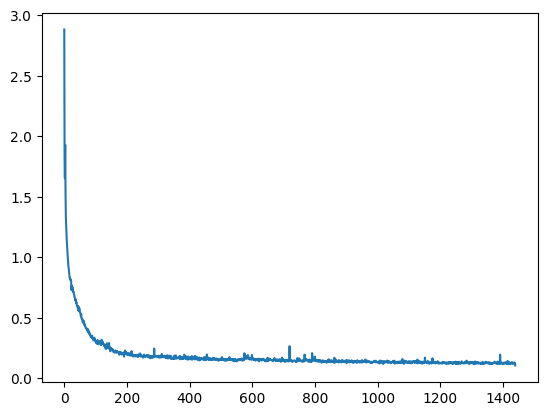

In [8]:
plt.plot(rectified_flow_1.loss_curve)
plt.show()

In [9]:
torch.save(rectified_flow_1, "./models/MNIST_6_Unet_biggerint.pth")

In [5]:
rectified_flow_1 = torch.load("./models/MNIST_6_Unet_biggerint.pth")

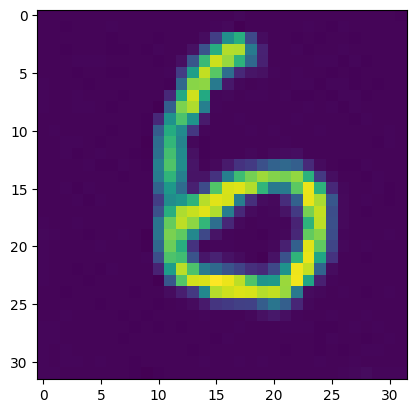

In [6]:
rectified_flow_1.v_model.eval()
img_init = torch.randn(20,1,32,32).to(device)

img = rectified_flow_1.sample_ode(img_init, 100)

#print(img[-1])

plt.imshow(img[-1][0, 0].detach().cpu().numpy())
plt.show()

[]

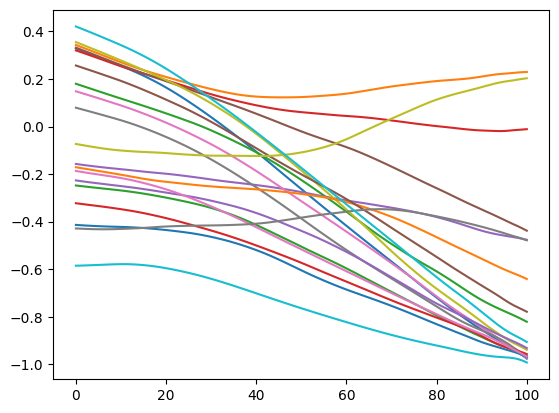

In [31]:
s = torch.zeros(20,len(img),1,32,32)
for i in range(len(img)):
    s[:,i] = img[i]
for i in range(20):
    plt.plot(s[i,:,0,15,15].cpu().numpy())
plt.plot()

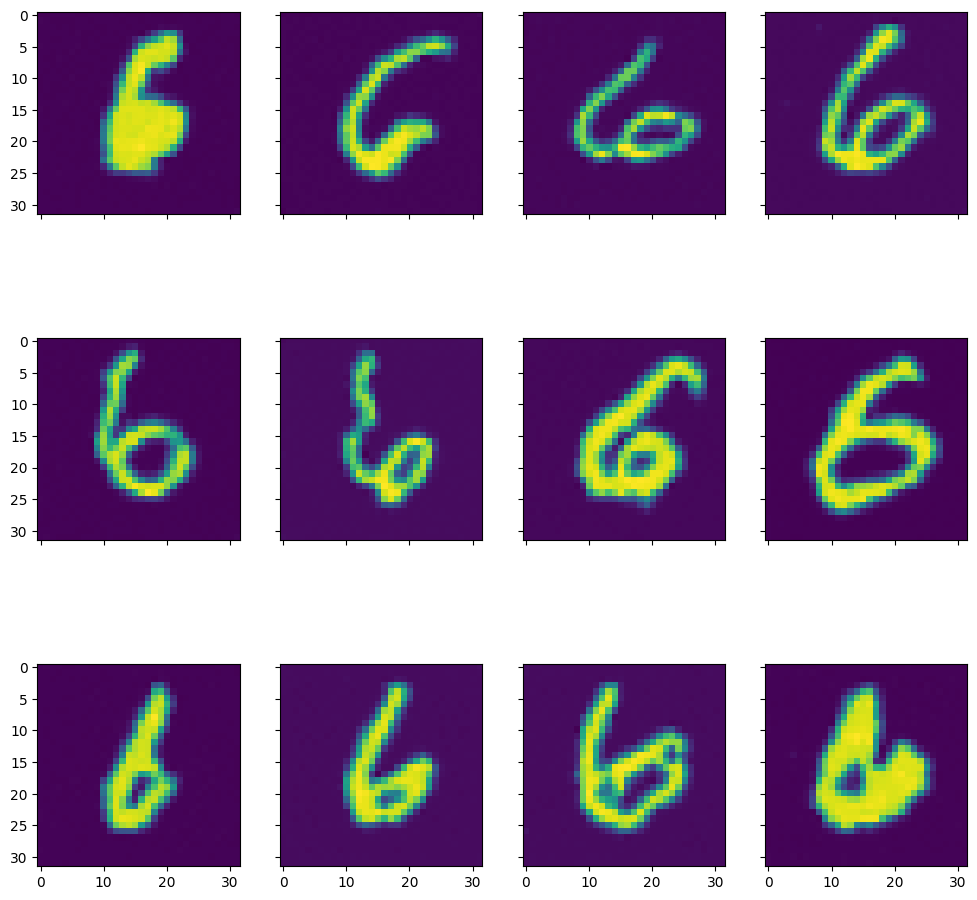

In [7]:
rows = 3
columns = 4
size = (12, 12)
fig, ax = plt.subplots(rows, columns, figsize=(size), sharex=True, sharey=True)

for row in range(rows):
    for column in range(columns):
        img_init = torch.randn(1,1,32,32).to(device)

        img = rectified_flow_1.sample_ode(img_init, 100)[-1][0,0].detach().cpu().numpy()
        ax[row, column].imshow(img)

plt.show()

In [6]:
samples_init = torch.randn(2000,1,32,32).to(device) / 3 # do this sampeling in batches ?
flow_1 = rectified_flow_1.sample_ode(samples_init, 100)

In [7]:
v_model_2 = U_Net(input_shape=input_shape, output_channels=1, initial_lr=5e-3, momentum=0.9, weight_decay=0.0)
rectified_flow_2 = RectifiedFlow_Unet(v_model_2, device)

In [8]:
optimizer_2 = torch.optim.Adam(rectified_flow_2.v_model.parameters(), lr=5e-3)
# optim.beta1 = 0.9
# optim.eps = 1e-8
#optimizer_1 = torch.optim.SGD(rectified_flow_1.v_model.parameters(), lr=5e-3, momentum=0.99)
scheduler_2 = optim.lr_scheduler.ReduceLROnPlateau(optimizer_2, factor=0.8, patience=80, verbose=True)

In [9]:
rectified_flow_2 = train_rectified_flow_Unet(rectified_flow_2, optimizer_2, scheduler_2, train_dataloader, device, epochs=60)

Epoch 00551: reducing learning rate of group 0 to 4.0000e-03.
Epoch 00652: reducing learning rate of group 0 to 3.2000e-03.
Epoch 00763: reducing learning rate of group 0 to 2.5600e-03.
Epoch 00880: reducing learning rate of group 0 to 2.0480e-03.
Epoch 00961: reducing learning rate of group 0 to 1.6384e-03.
Epoch 01042: reducing learning rate of group 0 to 1.3107e-03.
Epoch 01123: reducing learning rate of group 0 to 1.0486e-03.
Epoch 01278: reducing learning rate of group 0 to 8.3886e-04.
Epoch 01359: reducing learning rate of group 0 to 6.7109e-04.
Epoch 01440: reducing learning rate of group 0 to 5.3687e-04.
Epoch 01521: reducing learning rate of group 0 to 4.2950e-04.
Epoch 01602: reducing learning rate of group 0 to 3.4360e-04.
Epoch 01683: reducing learning rate of group 0 to 2.7488e-04.
Epoch 01764: reducing learning rate of group 0 to 2.1990e-04.
Epoch 01930: reducing learning rate of group 0 to 1.7592e-04.
Epoch 02011: reducing learning rate of group 0 to 1.4074e-04.
Epoch 02

In [10]:
torch.save(rectified_flow_2, "./models/MNIST_newest_ref1.pth")

In [5]:
rectified_flow_2 = torch.load("./models/MNIST_newest_ref1.pth")

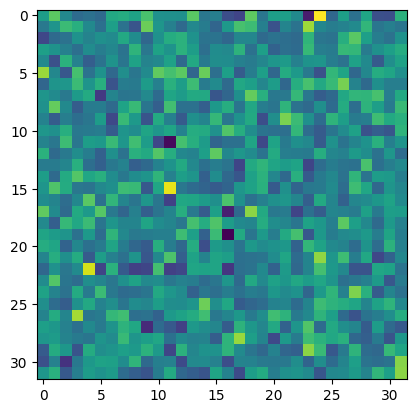

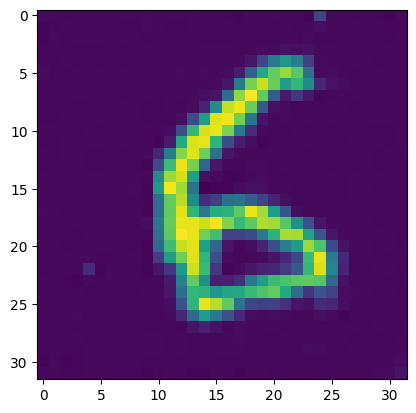

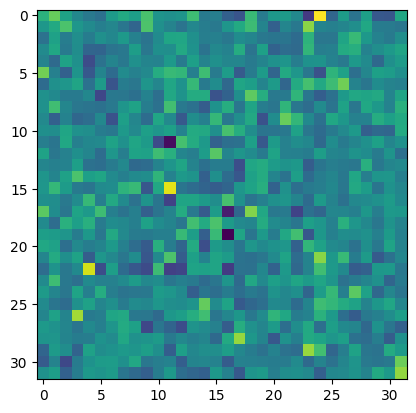

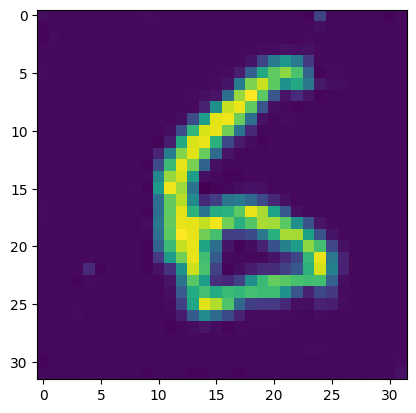

In [12]:
rectified_flow_2.v_model.eval()
img_init = torch.randn(1,1,32,32).to(device) / 3
plt.imshow(img_init[0, 0].detach().cpu().numpy())
plt.show()

img = rectified_flow_2.sample_ode(img_init, 100)[-1]
plt.imshow(img[0, 0].detach().cpu().numpy())
plt.show()
img_r = rectified_flow_2.reverse_sample_ode(img.reshape(1,1,32,32), 100)[-1]
plt.imshow(img_r[0, 0].detach().cpu().numpy())
plt.show()
img2 = rectified_flow_2.sample_ode(img_r, 100)[-1]
plt.imshow(img2[0, 0].detach().cpu().numpy())
plt.show()

In [1]:
s = torch.zeros(20,len(img),1,32,32)
for i in range(len(img)):
    s[:,i] = img[i]
for i in range(20):
    plt.plot(s[i,:,0,18,13].cpu().numpy())
plt.plot()

NameError: name 'torch' is not defined

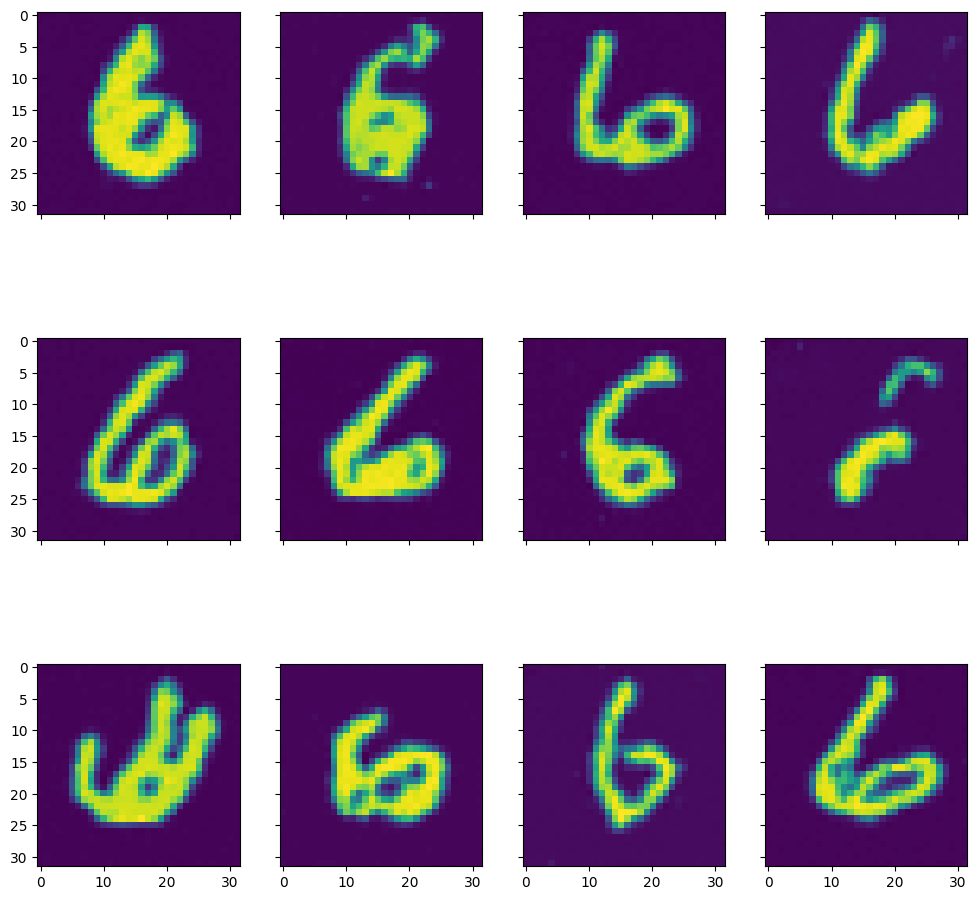

In [24]:
rows = 3
columns = 4
size = (12, 12)
fig, ax = plt.subplots(rows, columns, figsize=(size), sharex=True, sharey=True)

for row in range(rows):
    for column in range(columns):
        img_init = torch.randn(1,1,32,32).to(device) / 3

        img = rectified_flow_2.sample_ode(img_init, 100)[-1][0,0].detach().cpu().numpy()
        ax[row, column].imshow(img)

plt.show()

In [ ]:
def show_trajectories(rectified_flow):
    rectified